<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/ml20_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN(Recurrent Nueral Network, 순환 신경망)

시계열 데이터, 자연어 처리 등에서 좋은 성능을 주는 신경망.

# Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import tensorflow as tf
import keras

from sklearn.model_selection import train_test_split

# IMDB 데이터셋

* imdb 사이트 사용자들의 영화 리뷰를 긍정(1), 부정(0)으로 분류한 데이터.
* 25,000개 훈련 샘플과 25,000개 테스트 샘플.
* 샘플마다 토큰(단어)의 개수가 다름 - 샘플마다 특성(feature)의 개수가 다름. -> 전처리

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = \
    keras.datasets.imdb.load_data(num_words=200)
# num_words : 가장 자주 등장하는 단어 n개를 어휘 사전으로 사용.

In [ ]:
x_train_full.shape

(25000,)

In [ ]:
x_test.shape

(25000,)

In [ ]:
y_train_full.shape

(25000,)

In [ ]:
np.unique(y_train_full, return_counts=True)
#> 훈련 셋에는 긍정/부정 리뷰가 각각 12,500개씩 포함

(array([0, 1]), array([12500, 12500]))

In [ ]:
y_test.shape

(25000,)

In [ ]:
np.unique(y_test, return_counts=True)
#> 테스트 셋에서도 긍정/부정 리뷰가 각각 12,500개씩 포함.

(array([0, 1]), array([12500, 12500]))

## 훈련 셋 탐색

In [ ]:
print(x_train_full[0])
#> 훈련 셋의 첫번째 샘플은 정수들을 원소로 갖는 파이썬 리스트.

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
print(type(x_train_full[0]))

<class 'list'>


In [ ]:
print(len(x_train_full[0]))

218


훈련 셋의 첫번째 샘플은 정수 218개를 갖는 리스트(list).

In [ ]:
print(x_train_full[1])

[1, 194, 2, 194, 2, 78, 2, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 2, 20, 13, 119, 2, 189, 102, 5, 2, 110, 2, 21, 14, 69, 188, 8, 30, 23, 7, 4, 2, 126, 93, 4, 114, 9, 2, 2, 5, 2, 4, 116, 9, 35, 2, 4, 2, 9, 2, 2, 4, 118, 9, 4, 130, 2, 19, 4, 2, 5, 89, 29, 2, 46, 37, 4, 2, 9, 45, 43, 38, 2, 2, 2, 4, 2, 26, 2, 5, 163, 11, 2, 2, 4, 2, 9, 194, 2, 7, 2, 2, 2, 2, 148, 2, 2, 2, 15, 123, 125, 68, 2, 2, 15, 2, 165, 2, 98, 5, 4, 2, 9, 43, 2, 2, 15, 2, 120, 5, 120, 174, 11, 2, 175, 136, 50, 9, 2, 2, 2, 5, 2, 2, 2, 2, 5, 4, 2, 131, 152, 2, 18, 2, 32, 2, 2, 14, 9, 6, 2, 78, 22, 2, 64, 2, 9, 8, 168, 145, 23, 4, 2, 15, 16, 4, 2, 5, 28, 6, 52, 154, 2, 33, 89, 78, 2, 16, 145, 95]


In [ ]:
print(type(x_train_full[1]))

<class 'list'>


In [ ]:
print(len(x_train_full[1]))

189


훈련 셋의 두번째 샘플은 정수 189개를 갖는 리스트(list).

imdb 데이터 셋의 훈련 셋은 파이썬의 *리스트(list) 객체*를 원소로 갖는 **1차원 np.ndarray** 타입. 각각의 리스트들은 서로 다른 개수의 정수들을 포함하고 있음.

In [ ]:
for i in range(5):
    print(f'인덱스-{i} 샘플의 토큰(단어) 개수 : {len(x_train_full[i])}')

인덱스-0 샘플의 토큰(단어) 개수 : 218
인덱스-1 샘플의 토큰(단어) 개수 : 189
인덱스-2 샘플의 토큰(단어) 개수 : 141
인덱스-3 샘플의 토큰(단어) 개수 : 550
인덱스-4 샘플의 토큰(단어) 개수 : 147


In [ ]:
# 훈련 셋에서 첫5개 샘플에서 나오는 첫 20개의 인코딩 숫자들.
for i in range(5):
    print(x_train_full[i][:20])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25]
[1, 194, 2, 194, 2, 78, 2, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14]
[1, 14, 47, 8, 30, 31, 7, 4, 2, 108, 7, 4, 2, 54, 61, 2, 13, 71, 149, 14]
[1, 4, 2, 2, 33, 2, 4, 2, 2, 111, 153, 103, 4, 2, 13, 70, 131, 67, 11, 61]
[1, 2, 2, 7, 61, 113, 10, 10, 13, 2, 14, 20, 56, 33, 2, 18, 2, 88, 13, 2]


각각의 영화 리뷰의 길이(사용된 단어 개수)가 다르다. 1차원 리스트의 원소들은 영어 단어에 매칭된 숫자들.

In [ ]:
# word_index : 단어(word)를 키로 갖고, 그 단어의 인덱스(빈도수 순위)를 값으로 갖는 dict.
# 영화 리뷰의 단어들을 숫자로 인코딩할 때 사용하기 위해서 만들어진 dict.
# 숫자 인덱스는 데이터셋에 등장하는 빈도수에 따라서 결정.
word_index = keras.datasets.imdb.get_word_index()

In [ ]:
print(type(word_index)) #> 단어(word)를 키로 갖고, 그 단어의 인덱스를 값으로 갖는 dict.

<class 'dict'>


In [ ]:
len(word_index) #> 88,584개 단어와 그 인덱스를 저장.

88584

In [ ]:
for i, (k, v) in enumerate(word_index.items()):
    print(k, v)
    if i == 5:
        break

fawn 34701
tsukino 52006
nunnery 52007
sonja 16816
vani 63951
woods 1408


인덱스를 단어로 디코딩하기 위해서는 단어의 인덱스를 키로 하고 단어를 값으로 갖는 dict가 있었으면...

In [ ]:
index_word = {v: k for k, v in word_index.items()}

In [ ]:
for i, (k, v) in enumerate(index_word.items()):
    print(k, v)
    if i == 5:
        break

34701 fawn
52006 tsukino
52007 nunnery
16816 sonja
63951 vani
1408 woods


In [ ]:
for i in range(1, 6):
    print(index_word.get(i))

the
and
a
of
to


각 단어의 인덱스들은 단어의 빈도수 순위를 의미. 인덱스 0은 패딩(padding)을 위한 숫자.

영화 리뷰 샘플의 숫자들의 의미:
*   0: 패딩(padding)
*   1: 문장의 시작.
*   2: load_data() 함수의 아규먼트 num_words에 포함되지 않은 단어들.
*   3: word_index (또는 index_word)의 인덱스.

In [ ]:
def decode_review(review):
    # review : 숫자들의 리스트
    return ' '.join([index_word.get(i-3, '?') for i in review])

In [ ]:
decode_review(x_train_full[0])

"? this film was just ? ? ? ? story ? ? really ? the part they ? and you could just ? being there ? ? is an ? ? and now the same being director ? ? ? from the same ? ? as ? so i ? the fact there was a real ? with this film the ? ? ? the film were great it was just ? so much that i ? the film as ? as it was ? for ? and would ? it to ? to watch and the ? ? was ? really ? at the end it was so ? and you know what they say if you ? at a film it ? have been good and this ? was also ? to the two little ? that ? the ? of ? and ? they were just ? ? are ? ? out of the ? ? i think because the ? that ? them all ? up are such a big ? for the ? film but these ? are ? and should be ? for what they have ? don't you think the ? story was so ? because it was ? and was ? life after all that was ? with us all"

In [ ]:
decode_review(x_train_full[1])

"? big ? big ? bad ? and a ? ? ? these are the ? to best ? this ? movie i love ? horror movies and ? seen ? but this had got to be on of the ? ever made the plot is ? ? and ? the acting is an ? the ? is ? ? the best is the end ? with the ? and how he ? out who the ? is it's just so ? ? ? the ? are ? and funny in ? ? the ? is big ? of ? ? ? ? those ? ? ? that show off their ? ? that ? actually ? them and the ? is just ? ? that ? over and over again in ? every scene there is ? ? ? and ? ? ? ? and the ? still doesn't ? for ? all ? ? this is a ? bad film ? only ? is to look back on the ? that was the ? and have a good old ? at how bad ? was back then"

### 각 샘플의 길이 분포

각각의 영화 리뷰의 길이(포함된 단어 개수) 분포

In [ ]:
review_lengths = pd.Series([len(x) for x in x_train_full])

In [ ]:
review_lengths

,0
0,218
1,189
2,141
3,550
4,147
...,...
24995,180
24996,328
24997,184
24998,150


In [ ]:
review_lengths.describe()   # 기술 통계량

,0
count,25000.000000
mean,238.713640
std,176.497204
min,11.000000
25%,130.000000
50%,178.000000
75%,291.000000
max,2494.000000


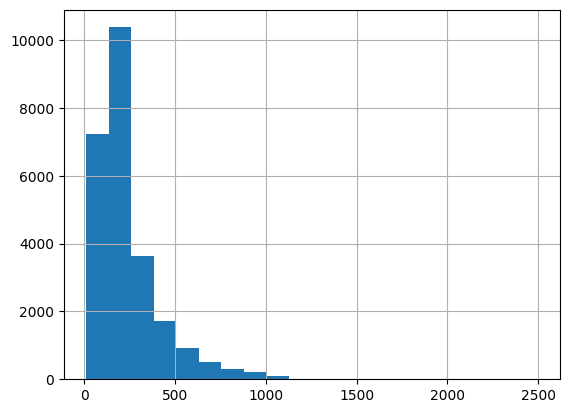

In [ ]:
review_lengths.hist(bins=20)   # 히스토그램
plt.show()

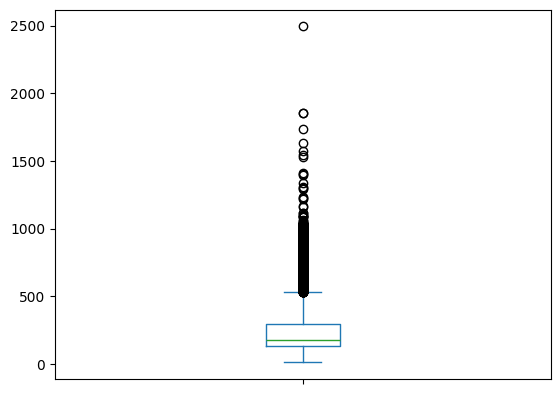

In [ ]:
review_lengths.plot.box()   #> outlier가 많은 분포.
plt.show()

 대부분의 리뷰에 사용된 단어의 개수는 300개 미만. 평균(238개)이 중앙값(178개)보다 많이 큰 이유는 사용된 단어의 개수가 매우 많은 리뷰들이 간혹 있기 때문에.

 신경망을 훈련시키기 위해서는 모든 샘플들의 길이가 같아야 함.

 샘플(영화 리뷰)마다 100개의 단어(토큰)만 사용. 길이가 100 이상인 샘플들은 잘라내고, 길이가 100 미만인 샘플들은 0으로 패딩을 추가.

## Data wrangling

(25,000, ) shape의 훈련/테스트 셋을 (25_000, 100) shape으로 변환.

`keras.preprocessing.sequence.pad_sequence()` 함수의 파라미터 :
* sequences : 변환할 데이터
* maxlen : 각 샘플의 최대 길이.
* padding : 샘플의 길이가 maxlen보다 짧을 때 패딩을 넣을 위치. 기본값은 'pre'. 기본값은 패딩(0)을 시퀀스의 앞쪽에 채움.
* truncating : 샘플의 길이가 maxlen보다 길 때 샘플을 자르는 위치. 기본값은 'pre', 기본값은 시퀀스의 앞쪽을 자름.
* 순환신경망을 사용할 때 padding과 truncating은 모두 'pre' 방식을 선호.

In [ ]:
x_train_full_seq = keras.preprocessing.sequence.pad_sequences(sequences=x_train_full,
                                                              maxlen=100)

In [ ]:
x_train_full_seq.shape  #> (n_samples, n_tokens)

(25000, 100)

In [ ]:
x_test_seq = keras.preprocessing.sequence.pad_sequences(sequences=x_test,
                                                        maxlen=100)

In [ ]:
x_test_seq.shape

(25000, 100)

In [ ]:
print(x_train_full_seq[0])

[  2  33   6  22  12   2  28  77  52   5  14   2  16  82   2   8   4 107
 117   2  15   2   4   2   7   2   5   2  36  71  43   2   2  26   2   2
  46   7   4   2   2  13 104  88   4   2  15   2  98  32   2  56  26 141
   6 194   2  18   4   2  22  21 134   2  26   2   5 144  30   2  18  51
  36  28   2  92  25 104   4   2  65  16  38   2  88  12  16   2   5  16
   2 113 103  32  15  16   2  19 178  32]


In [ ]:
type(x_train_full_seq)

numpy.ndarray

In [ ]:
print(x_train_full[0][-100:])    # 첫번째 샘플의 마지막 100개 토큰.
#> truncating = 'pre' : 원본 샘플의 앞쪽을 잘라서 버림.

[2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
type(x_train_full)

numpy.ndarray

In [ ]:
for i in range(25_000):
    if x_train_full_seq[i, 0] == 0:     # 첫 번째 단어가 0인지 확인. 패딩 토큰(PAD token)
        print(f'i = {i}')
        print(x_train_full_seq[i])
        break

i = 5
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   1   2 128  74  12   2 163  15   4   2   2   2   2  32  85
 156  45  40 148 139 121   2   2  10  10   2 173   4   2   2  16   2   8
   4   2  65  12  43 127  24   2  10  10]


In [ ]:
print(x_train_full[5])
#> padding='pre' : 시퀀스의 길이를 100으로 만들기 위해서 원본 샘플의 앞쪽에 0을 채움.

[1, 2, 128, 74, 12, 2, 163, 15, 4, 2, 2, 2, 2, 32, 85, 156, 45, 40, 148, 139, 121, 2, 2, 10, 10, 2, 173, 4, 2, 2, 16, 2, 8, 4, 2, 65, 12, 43, 127, 24, 2, 10, 10]


# RNN

* FFNN(Feed-Forward Neural Network) : 데이터의 흐름이 앞으로만 전달되는 신경망
    * 완전 연결 신경망
    * 합성곱 신경망(CNN, Convolutional Neural Network)
* RNN(Recurrent Neural Network) : 순환 신경망
    * 순차 데이터(sequencial data) : 순환 신경망에서 사용하는 데이터. 텍스트(문장) 또는 시계열 데이터와 같이 순서가 의미가 있는 데이터.
    * timestep : 샘플을 처리하는 한 단계. 시퀀스의 각 원소.
    * cell(셀) : 순환 신경망 층(recurrent layer)
    * hidden state(은닉 상태) : 셀의 출력(output)
    * sequence(시퀀스) : 순환 신경망에서 사용하는 하나의 샘플.
    * 자연어 처리(NLP, Natural Language Processing)와 같은 경우에 특정 단어가 다른 단어보다 더 중요할 이유는 없음. 단어가 정수로 인코딩된 값의 대소가 중요하지 않음. 인코딩된 정수가 신경망으로 주입되면 안됨.
        * 정수를 one-hot encoding으로 변환.
            * 단점 : 계산량이 많아지고 메모리를 많이 사용함.
        * 정수를 word-embedding으로 변환.
            * one-hot encoding의 단점을 보완.
            * 정수 1개를 몇 개의 실수들로 인코딩하는 방법.

## One-Hot Encoding을 사용한 RNN

In [ ]:
x_train_full_1h = keras.utils.to_categorical(x=x_train_full_seq)

In [ ]:
x_train_full_1h.shape   # (n_samples, n_timesteps, n_classes)

(25000, 100, 200)

In [ ]:
x_test_1h = keras.utils.to_categorical(x=x_test_seq)

In [ ]:
x_test_1h.shape     # (n_samples, n_timesteps, n_classes)

(25000, 100, 200)

In [ ]:
x_train_full_1h[0, 0]   # 첫번째 샘플(리뷰)의 첫번째 타임스텝(단어)의 1-hot 인코딩.

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# 전체 훈련 셋을 훈련/검증 셋으로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full_1h, y_train_full,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=y_train_full)        # 용량이 커서 터질 가능성 有

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(20000, 100, 200)
(20000,)
(5000, 100, 200)
(5000,)


## Word Embedding을 사용한 RNN

keras.layers.Embedding 객체를 사용.

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full_seq, y_train_full,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=y_train_full)

In [ ]:
x_train.shape   #> (n_samples, n_timesteps)

(20000, 100)

In [ ]:
x_val.shape     #> (n_samples, n_timesteps)

(5000, 100)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

rnn_1 = keras.Sequential(layers=[
    keras.Input(shape=(100, )),     # 입력층
    keras.layers.Embedding(input_dim=200, output_dim=16),   # 단어 임베딩 계층
    keras.layers.SimpleRNN(units=8),    # 순환 계층
    keras.layers.Dense(units=1, activation='sigmoid')   # 출력층
])

In [ ]:
rnn_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 100, 16)        │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,409 (13.32 KB)

 Trainable params: 3,409 (13.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Embedding 계층의 모델 파라미터 개수 = 단어 사전 어휘 개수 x 임베딩 출력
200 * 16

3200

In [ ]:
# SimpleRNN 모델 파라미터 개수 = (각 타임스텝의 입력값 개수 + 순환 셀 개수 + 바이어스) * 순환 셀 개수
(16 + 8 + 1) * 8

200

In [ ]:
# 출력층의 모델 파라미터 개수
8 + 1

9

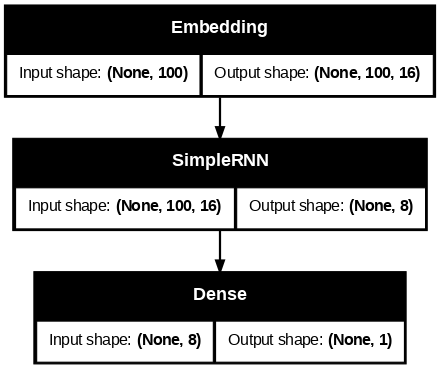

In [ ]:
keras.utils.plot_model(rnn_1, show_shapes=True, dpi=80)

In [ ]:
# 모델 컴파일
rnn_1.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=[keras.metrics.binary_accuracy])

In [ ]:
# 체크포인트, 조기종료 콜백
checkpoint = keras.callbacks.ModelCheckpoint(filepath='rnn_1.keras',
                                             save_best_only=True)

early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [ ]:
#  모델 훈련
result = rnn_1.fit(x=x_train, y=y_train, batch_size=64, callbacks=[checkpoint, early_stop],
                   validation_data=[x_val, y_val], epochs=100)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - binary_accuracy: 0.5388 - loss: 0.6900 - val_binary_accuracy: 0.5590 - val_loss: 0.6846
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - binary_accuracy: 0.6266 - loss: 0.6586 - val_binary_accuracy: 0.6538 - val_loss: 0.6303
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - binary_accuracy: 0.6782 - loss: 0.6036 - val_binary_accuracy: 0.6876 - val_loss: 0.5936
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - binary_accuracy: 0.6991 - loss: 0.5820 - val_binary_accuracy: 0.6814 - val_loss: 0.5912
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - binary_accuracy: 0.7058 - loss: 0.5804 - val_binary_accuracy: 0.6936 - val_loss: 0.5872
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - binary_accuracy: 0.7045 - loss: 0.5809 - val_binary_accuracy: 0.6988 - val_loss: 0.5874
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - binary_accuracy: 0.7095 - loss: 0.5725 - val_binary_accuracy: 0.6910 - val_loss:

In [47]:
def plot_train_val_loss(history):
    epochs = history.epoch
    history = history.history
    plt.plot(epochs, history['loss'], 'bo-', label='train loss')
    plt.plot(epochs, history['val_loss'], 'ro:', label='val loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.grid()
    plt.show()

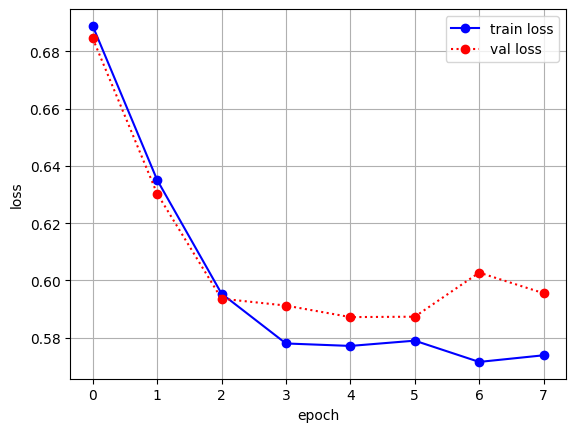

In [ ]:
plot_train_val_loss(result)

In [ ]:
# 훈련 셋 예측값
train_predicts = rnn_1.predict(x=x_train)

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
train_predicts[:10]

array([[0.8279982 ],
       [0.267995  ],
       [0.24927372],
       [0.17204556],
       [0.7259075 ],
       [0.64717424],
       [0.43839642],
       [0.61915517],
       [0.74214965],
       [0.56079745]], dtype=float32)

In [ ]:
train_pred_labels = (train_predicts > 0.5).astype(int).ravel()

In [ ]:
train_pred_labels[:10]

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1])

In [ ]:
y_train[:10]

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
np.mean(train_pred_labels == y_train)

np.float64(0.71915)

In [ ]:
# 검증 셋 예측값
val_predicts = rnn_1.predict(x=x_val)   # 검증 셋 예측값
val_pred_labels = (val_predicts > 0.5).astype('int').ravel()    # 예측 레이블(타겟)
np.mean(val_pred_labels == y_val)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


np.float64(0.6936)

# 연습

* imdb 데이터셋을 다시 로딩. 자주 사용되는 단어 500개를 사용.
    * x_train_full의 shape = (25_000,)
* 훈련 셋의 모든 샘플을 100개의 timestep을 갖는 시퀀스로 변환
    * x_train_full_seq의 shape = (25_000, 100)
* 단어 임베딩을 사용한 가장 간단한 RNN을 생성.
    * WordEmbedding -> SimpleRNN -> Dense
    * 단어 임베딩의 출력은 32로 설정.
    * 순환망의 셀 개수는 32로 설정.
    * 순환망의 dropout 비율을 0.3으로 설정.
* 모델을 훈련하고 평가.

## imdb 데이터셋 로딩

In [23]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=500)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [24]:
print(x_train_full.shape)
print(y_train_full.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


## 100개의 timestep을 갖는 시퀀스 변환

In [25]:
x_train_full_seq = keras.preprocessing.sequence.pad_sequences(sequences=x_train_full,
                                                              maxlen=100)

In [26]:
x_train_full_seq.shape

(25000, 100)

In [27]:
x_test_seq = keras.preprocessing.sequence.pad_sequences(sequences=x_test,
                                                        maxlen=100)

In [28]:
x_test_seq.shape

(25000, 100)

## 단어 임베딩을 사용한 가장 간단한 RNN 생성

In [29]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full_seq, y_train_full, test_size=0.2, stratify=y_train_full)

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)

(20000, 100)
(20000,)
(5000, 100)


In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

simple_rnn = keras.Sequential(layers=[
    keras.layers.Input(shape=(100,)),
    keras.layers.Embedding(input_dim=500, output_dim=32),
    keras.layers.SimpleRNN(units=32, dropout=0.3),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
simple_rnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 100, 32)        │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,113 (70.75 KB)

 Trainable params: 18,113 (70.75 KB)

 Non-trainable params: 0 (0.00 B)

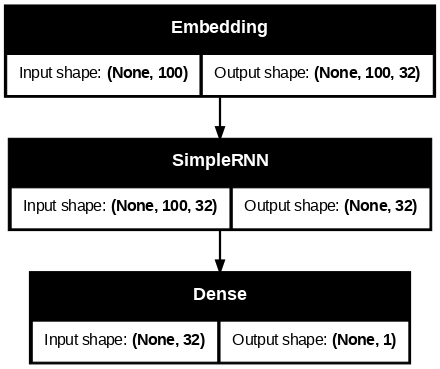

In [ ]:
keras.utils.plot_model(simple_rnn, show_shapes=True, dpi=80)

## 모델 컴파일

In [ ]:
simple_rnn.compile(optimizer=keras.optimizers.Adam(),
                   loss=keras.losses.BinaryCrossentropy(),
              metrics=[keras.metrics.binary_accuracy])

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath='simple_rnn.keras', save_best_only=True)
early_point = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

## 모델 훈련

In [ ]:
result = simple_rnn.fit(x=x_train_full_seq, y=y_train_full, batch_size=32, epochs=100, callbacks=[checkpoint, early_point],
               validation_data=[x_val, y_val])

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - binary_accuracy: 0.5417 - loss: 0.6855 - val_binary_accuracy: 0.6058 - val_loss: 0.6584
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - binary_accuracy: 0.6341 - loss: 0.6401 - val_binary_accuracy: 0.7072 - val_loss: 0.5653
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - binary_accuracy: 0.6359 - loss: 0.6405 - val_binary_accuracy: 0.7242 - val_loss: 0.5568
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - binary_accuracy: 0.6787 - loss: 0.6006 - val_binary_accuracy: 0.6090 - val_loss: 0.6411
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - binary_accuracy: 0.6735 - loss: 0.6002 - val_binary_accuracy: 0.7448 - val_loss: 0.5299
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - binary_accuracy: 0.7123 - loss: 0.5616 - val_binary_accuracy: 0.6960 - val_loss: 0.6562
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - binary_accuracy: 0.7308 - loss: 0.5549 - val_binary_accuracy: 0.6250 - va

## 결과 시각화

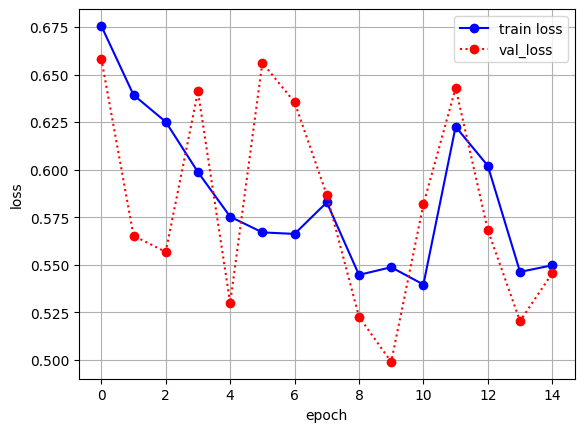

In [ ]:
epochs = result.epoch
history = result.history
plt.plot(epochs, history['loss'], 'bo-', label='train loss')
plt.plot(epochs, history['val_loss'], 'ro:', label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

## 훈련 셋 예측값

In [ ]:
train_predicts = simple_rnn.predict(x=x_train)
train_pred_labels = (train_predicts > 0.5).astype('int').ravel()
np.mean(train_pred_labels == y_train)

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


np.float64(0.77495)

## 검증 셋 예측값

In [ ]:
val_predicts = simple_rnn.predict(x=x_val)
val_pred_labels = (val_predicts > 0.5).astype('int').ravel()
np.mean(val_pred_labels == y_val)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


np.float64(0.7646)

# LSTM(Long Short-Term Memory, 장/단기 기억)

*   단기 기억을 오래 기억하기 위해서 고안된 순환 신경망.
*   LSTM 셀 한 개는 입력 게이트, 삭제 게이트, 출력 게이트를 가지고 있음.
    *   입력 게이트: 새로운 정보를 셀 상태(cell state)에 추가. 단기 기억 저장.
    *   삭제 게이트: 셀 상태에 있는 정보를 제거. 장기 기억을 삭제.
    *   출력 게이트: 다음 은닉 상태(hidden state)로 출력을 내보냄.
    *   LSTM 셀 한 개는 작은 순환 신경 셀 4개로 이루어진 구조.

In [12]:
tf.random.set_seed(42)
np.random.seed(42)

model_lstm = keras.Sequential(layers=[
    keras.Input(shape=(100,)),
    keras.layers.Embedding(input_dim=500, output_dim=32),
    keras.layers.LSTM(units=32),
    keras.layers.Dense(units=1, activation='sigmoid')
])

model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 32)        │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,353 (95.13 KB)

 Trainable params: 24,353 (95.13 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# LSTM 층의 모델 파라미터 개수 = (embedding input + 순환입력 + 바이어스) * 게이트(4) * 셀
(32 + 32 + 1) * 4 * 32

8320

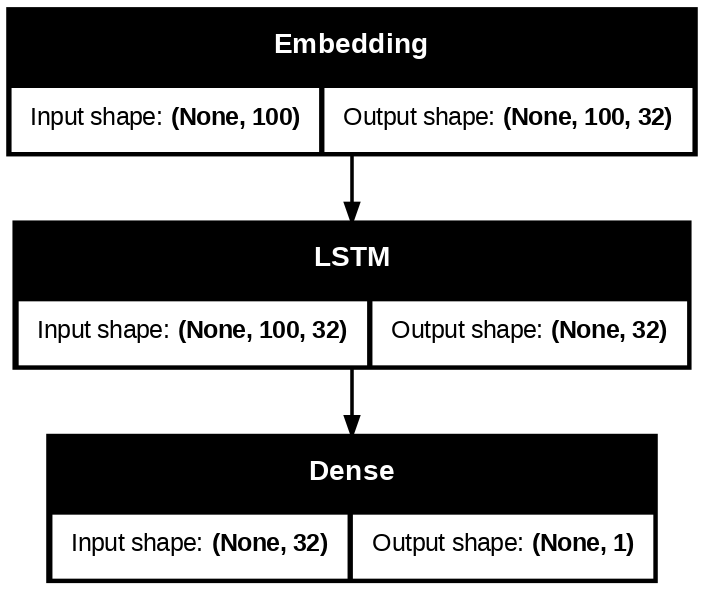

In [14]:
keras.utils.plot_model(model=model_lstm, show_shapes=True, dpi=128)

In [84]:
model_lstm.compile(optimizer=keras.optimizers.Adam(),
                   loss=keras.losses.BinaryCrossentropy(),
                   metrics=[keras.metrics.binary_accuracy])

In [85]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath='lstm.keras', save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [86]:
result = model_lstm.fit(x=x_train, y=y_train, batch_size=64, epochs=100, callbacks=[checkpoint, early_stop], validation_data=[x_val, y_val])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - binary_accuracy: 0.6195 - loss: 0.6280 - val_binary_accuracy: 0.7312 - val_loss: 0.5374
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - binary_accuracy: 0.7833 - loss: 0.4629 - val_binary_accuracy: 0.7782 - val_loss: 0.4611
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - binary_accuracy: 0.7994 - loss: 0.4356 - val_binary_accuracy: 0.7830 - val_loss: 0.4507
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - binary_accuracy: 0.8056 - loss: 0.4217 - val_binary_accuracy: 0.7856 - val_loss: 0.4459
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - binary_accuracy: 0.8099 - loss: 0.4086 - val_binary_accuracy: 0.7890 - val_loss: 0.4451
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - binary_accuracy: 0.8133 - loss: 0.3980 - val_binary_accuracy: 0.7978 - val_loss: 0.4466
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - binary_accuracy: 0.8179 - loss: 0.3881 - val_binary_accuracy: 0.8068 - va

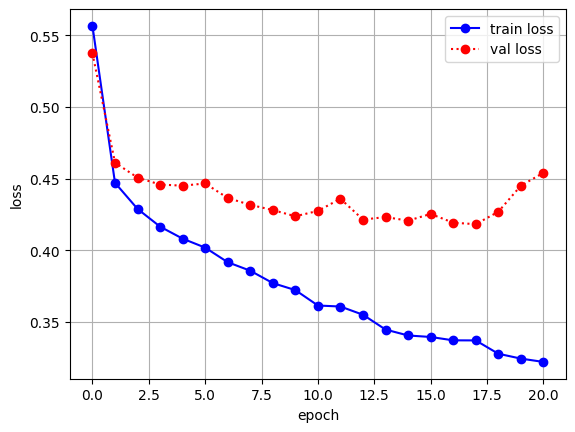

In [87]:
plot_train_val_loss(result)

In [88]:
model_lstm.evaluate(x=x_train, y=y_train)

625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - binary_accuracy: 0.8584 - loss: 0.3261


[0.32323455810546875, 0.859000027179718]

In [89]:
model_lstm.evaluate(x=x_val, y=y_val)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - binary_accuracy: 0.8066 - loss: 0.4219


[0.41819316148757935, 0.8104000091552734]

## Drop-out을 적용한 LSTM

In [91]:
model_lstm2 = keras.Sequential(layers=[
    keras.Input(shape=(100,)),
    keras.layers.Embedding(input_dim=500, output_dim=32),
    keras.layers.LSTM(units=32, dropout=0.2),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [92]:
model_lstm2.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 100, 32)        │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,353 (95.13 KB)

 Trainable params: 24,353 (95.13 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
model_lstm2.compile(optimizer=keras.optimizers.Adam(),
                    loss=keras.losses.BinaryCrossentropy(),
                    metrics=[keras.metrics.binary_accuracy])

In [95]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath='lstm_dropout.keras', save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [96]:
result = model_lstm2.fit(x=x_train, y=y_train, batch_size=32, epochs=100,
                         callbacks=[checkpoint, early_stop],
                         validation_data=[x_val, y_val])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - binary_accuracy: 0.6281 - loss: 0.6316 - val_binary_accuracy: 0.7810 - val_loss: 0.4659
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - binary_accuracy: 0.7836 - loss: 0.4622 - val_binary_accuracy: 0.7900 - val_loss: 0.4477
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - binary_accuracy: 0.7926 - loss: 0.4391 - val_binary_accuracy: 0.7948 - val_loss: 0.4478
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - binary_accuracy: 0.8008 - loss: 0.4235 - val_binary_accuracy: 0.7934 - val_loss: 0.4558
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - binary_accuracy: 0.8110 - loss: 0.4106 - val_binary_accuracy: 0.7858 - val_loss: 0.4620


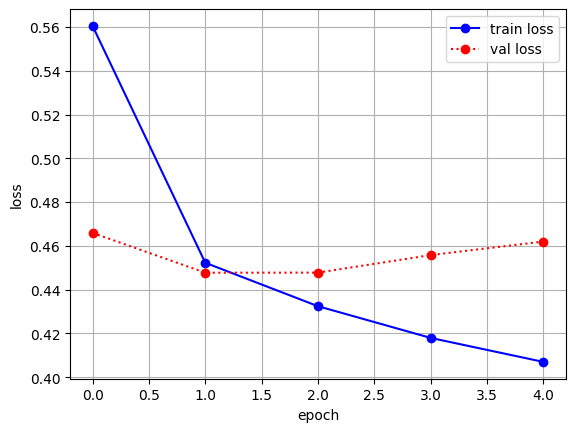

In [97]:
plot_train_val_loss(result)

In [98]:
model_lstm2.evaluate(x=x_train, y=y_train)

625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - binary_accuracy: 0.8121 - loss: 0.4104


[0.40772879123687744, 0.8122000098228455]

In [99]:
model_lstm2.evaluate(x=x_val, y=y_val)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - binary_accuracy: 0.7859 - loss: 0.4521


[0.4477430284023285, 0.7900000214576721]

## 2개의 LSTM 층 연결

* Embedding --> LSTM(1) --> LSTM(2) --> 출력층
* Embedding의 층의 output_dim은 32로 설정
* LSTM(1)의 셀의 개수는 32개. dropout은 0.2로 설정.
    * return_sequences 파라미터 값 설정.
* LSTM(2)의 셀의 개수와 dropout 비율은 첫번째와 동일하게.
    * return_sequences 파라미터 값을 기본값(default argument)과 다르게 사용.

In [39]:
model_lstm3 = keras.Sequential(layers=[
    keras.Input(shape=(100,)),
    keras.layers.Embedding(input_dim=500, output_dim=32),
    keras.layers.LSTM(units=32, dropout=0.2, return_sequences=True),
    keras.layers.LSTM(units=32, dropout=0.2, return_sequences=False),
    keras.layers.Dense(units=1, activation='sigmoid')
])

2개 이상의 LSTM 층을 연결할 때,
* 원래 순환층(RNN, LSTM)의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 그 다음 층으로 전달.
* 순환층을 2개 이상 쌓게 되면 모든 순환층에서 순차 데이터(시퀀스)가 필요.
* 따라서 앞쪽 순환층이 모든 타임스텝에 대한 은닉 상태를 출력해야 함. 시퀀스를 다음 순환층으로 입력해줘야 함.
* 오직 마지막 순환층에서만 마지막 타임스텝의 은닉 상태를 출력해야 함.
* 중간에 포함된 순환층에서는 return_sequences=True로 설정해야 함.
* 마지막 순환층에서만 return_sequences=False (기본값)으로 설정해야 함.

In [40]:
model_lstm3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 100, 32)        │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 100, 32)        │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,673 (127.63 KB)

 Trainable params: 32,673 (127.63 KB)

 Non-trainable params: 0 (0.00 B)

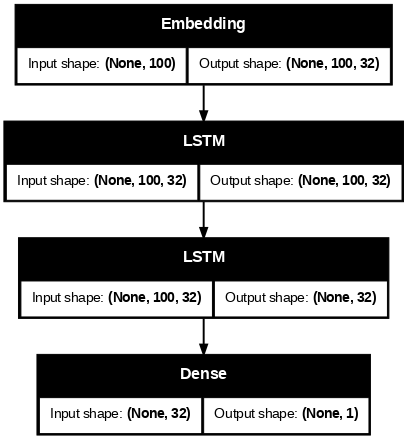

In [41]:
keras.utils.plot_model(model_lstm3, show_shapes=True, dpi=70)

In [42]:
model_lstm3.compile(optimizer=keras.optimizers.Adam(),
                    loss=keras.losses.binary_crossentropy,
                    metrics=[keras.metrics.binary_accuracy])

In [44]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath='lstm_2.keras', save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [45]:
result = model_lstm3.fit(x=x_train, y=y_train, batch_size=34, epochs=100, callbacks=[checkpoint, early_stop], validation_data=[x_val, y_val])

Epoch 1/100
589/589 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - binary_accuracy: 0.6381 - loss: 0.6072 - val_binary_accuracy: 0.7882 - val_loss: 0.4638
Epoch 2/100
589/589 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - binary_accuracy: 0.7894 - loss: 0.4575 - val_binary_accuracy: 0.7936 - val_loss: 0.4535
Epoch 3/100
589/589 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - binary_accuracy: 0.7997 - loss: 0.4303 - val_binary_accuracy: 0.8024 - val_loss: 0.4552
Epoch 4/100
589/589 ━━━━━━━━━━━━━━━━━━━━ 40s 67ms/step - binary_accuracy: 0.8051 - loss: 0.4163 - val_binary_accuracy: 0.8000 - val_loss: 0.4484
Epoch 5/100
589/589 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - binary_accuracy: 0.8126 - loss: 0.4064 - val_binary_accuracy: 0.7946 - val_loss: 0.4534
Epoch 6/100
589/589 ━━━━━━━━━━━━━━━━━━━━ 42s 70ms/step - binary_accuracy: 0.8157 - loss: 0.3998 - val_binary_accuracy: 0.7928 - val_loss: 0.4527
Epoch 7/100
589/589 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - binary_accuracy: 0.8190 - loss: 0.3925 - val_binary_accuracy: 0.7874 - va

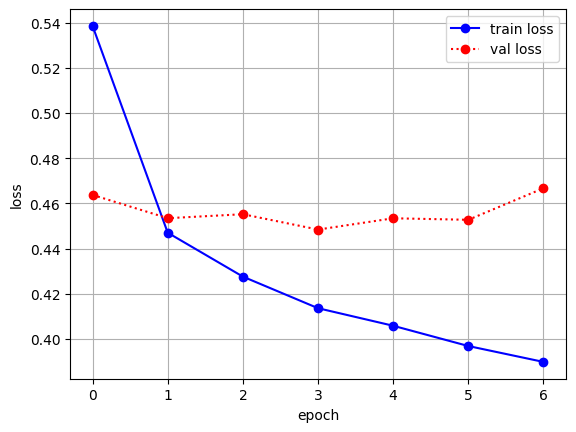

In [48]:
plot_train_val_loss(result)

In [49]:
model_lstm3.evaluate(x=x_train, y=y_train)

625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - binary_accuracy: 0.8268 - loss: 0.3894


[0.38411518931388855, 0.8263499736785889]

In [51]:
model_lstm3.evaluate(x=x_val, y=y_val)

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - binary_accuracy: 0.7963 - loss: 0.4519


[0.4484206438064575, 0.800000011920929]

# GRU(Gated Recurrent Unit)

* 3개의 작은 셀들로 이루어진 순환 셀. 2개는 sigmoid, 1개는 tanh를 활성화 함수로 사용.
* LSTM보다 훈련을 통해서 찾는 모델 파라미터 개수가 작아짐. 계산량이 작아짐.
* 일반적으로 LSTM보다 더 좋은 성능을 냄.

In [65]:
model_gru = keras.Sequential(layers=[
    keras.Input(shape=(100,)),
    keras.layers.Embedding(input_dim=500, output_dim=32),
    keras.layers.GRU(units=32, activation='sigmoid', return_sequences=True),
    keras.layers.GRU(units=32, activation='sigmoid', return_sequences=True),
    keras.layers.GRU(units=32, activation='tanh'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [74]:
model_gru = keras.Sequential(layers=[
    keras.Input(shape=(100,)),
    keras.layers.Embedding(input_dim=500, output_dim=32),
    keras.layers.GRU(units=32, dropout=0.2),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [75]:
model_gru.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 100, 32)        │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,369 (87.38 KB)

 Trainable params: 22,369 (87.38 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# GRU 층에서 학습되는 모델 파라미터 개수
# (embedding inputs + 순환 은닉 입력 + bias) * 게이트(3) * GRU 셀 개수(32) + Keras 구현
(32 + 32 + 1) * 3 * 32 + (2 + 1) * 32

6336

In [76]:
model_gru.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.binary_crossentropy,
                  metrics=[keras.metrics.binary_accuracy])

In [77]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath='gru.keras', save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [78]:
result = model_gru.fit(x=x_train, y=y_train, batch_size=32, epochs=100, callbacks=[checkpoint, early_stop], validation_data=[x_val, y_val])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - binary_accuracy: 0.6221 - loss: 0.6281 - val_binary_accuracy: 0.7360 - val_loss: 0.5214
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - binary_accuracy: 0.7761 - loss: 0.4735 - val_binary_accuracy: 0.7918 - val_loss: 0.4472
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - binary_accuracy: 0.8002 - loss: 0.4341 - val_binary_accuracy: 0.7948 - val_loss: 0.4383
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - binary_accuracy: 0.8124 - loss: 0.4142 - val_binary_accuracy: 0.7886 - val_loss: 0.4457
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - binary_accuracy: 0.8174 - loss: 0.4034 - val_binary_accuracy: 0.7910 - val_loss: 0.4381
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - binary_accuracy: 0.8236 - loss: 0.3916 - val_binary_accuracy: 0.7948 - val_loss: 0.4351
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - binary_accuracy: 0.8253 - loss: 0.3830 - val_binary_accuracy: 0.8036 - va

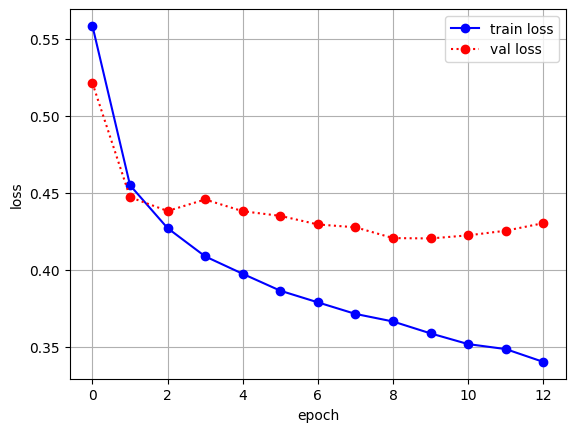

In [81]:
plot_train_val_loss(result)

In [82]:
model_gru.evaluate(x=x_train, y=y_train)

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - binary_accuracy: 0.8511 - loss: 0.3384


[0.334893137216568, 0.8506500124931335]

In [83]:
model_gru.evaluate(x=x_val, y=y_val)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - binary_accuracy: 0.8047 - loss: 0.4196


[0.42039990425109863, 0.8086000084877014]